In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define image size and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16

In [ ]:
# Paths to your dataset - Update these to the correct paths on your Linux machine
train_path = r'/content/drive/MyDrive/fish image/train'
val_path = r'/content/drive/MyDrive/fish image/val'
test_path = r'/content/drive/MyDrive/fish image/test'

In [ ]:
# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize to [0,1]
    rotation_range=20,        # Random rotation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.2,    # Width shift
    height_shift_range=0.2,   # Height shift
    shear_range=0.15,         # Shear transform
    fill_mode='nearest'       # Filling in new pixels
)

In [ ]:
# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load test data
test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


Just Verification

Shape of image batch: (16, 128, 128, 3)
Min pixel value: 0.0
Max pixel value: 1.0


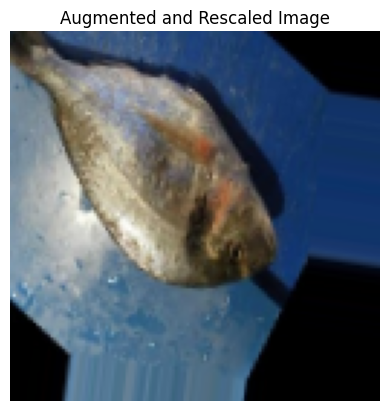

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)

# Check shape and pixel range
print("Shape of image batch:", images.shape)
print("Min pixel value:", np.min(images))
print("Max pixel value:", np.max(images))

# Show one example image
plt.imshow(images[0])
plt.title("Augmented and Rescaled Image")
plt.axis('off')
plt.show()

#CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # First conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))                                     # Downsampling

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into Dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))  # softmax for multiclass

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(
    train_generator,
    validation_data=val_test_datagen.flow_from_directory(
        val_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    ),
    epochs=5
)

Found 1092 images belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 1679s 4s/step - accuracy: 0.2731 - loss: 2.0505 - val_accuracy: 0.5348 - val_loss: 1.4137
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.4551 - loss: 1.4930 - val_accuracy: 0.7326 - val_loss: 0.8448
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.5768 - loss: 1.1501 - val_accuracy: 0.6502 - val_loss: 0.9255
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - accuracy: 0.6517 - loss: 0.9647 - val_accuracy: 0.8104 - val_loss: 0.5395
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.7236 - loss: 0.7837 - val_accuracy: 0.8223 - val_loss: 0.5102


In [10]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")

200/200 ━━━━━━━━━━━━━━━━━━━━ 778s 4s/step - accuracy: 0.8417 - loss: 0.4414
Test accuracy: 80.11%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'/content/drive/MyDrive/fish image/yellow_fin_tuna_whole.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match training size
img_array = image.img_to_array(img)                     # Convert to numpy array (H, W, C)
img_array = img_array / 255.0                           # Normalize to [0,1] like training
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension -> (1, 128, 128, 3)

# Make prediction
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]

# Get the class labels from the training generator
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: animal fish


#5 Models

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

#VGG16 — Transfer Learning & Fine-tuning

In [14]:
NUM_CLASSES = 11
EPOCHS = 3
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load base model (exclude top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save only best model
checkpoint = ModelCheckpoint('vgg16_best.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train
history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stop]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1966 - loss: 2.3137

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 67s 154ms/step - accuracy: 0.1968 - loss: 2.3132 - val_accuracy: 0.5229 - val_loss: 1.7358
Epoch 2/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4213 - loss: 1.7421

390/390 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - accuracy: 0.4214 - loss: 1.7420 - val_accuracy: 0.6209 - val_loss: 1.4609
Epoch 3/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5121 - loss: 1.4933

390/390 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.5122 - loss: 1.4932 - val_accuracy: 0.6493 - val_loss: 1.2889


phase 2: Model Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load best model
model_vgg16 = tf.keras.models.load_model('vgg16_best.h5')

# Predict on test set
Y_pred = model_vgg16.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_mat)

200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step
Classification Report:
                                   precision    recall  f1-score   support

                     animal fish       0.95      0.98      0.96       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.85      0.56      0.67       298
   fish sea_food gilt_head_bream       0.91      0.19      0.31       305
   fish sea_food hourse_mackerel       0.43      0.94      0.59       286
        fish sea_food red_mullet       0.63      0.52      0.57       291
     fish sea_food red_sea_bream       0.68      0.72      0.70       273
          fish sea_food sea_bass       0.72      0.45      0.55       327
            fish sea_food shrimp       0.52      0.88      0.65       289
fish sea_food striped_red_mullet       0.51      0.46      0.49       293
             fish sea_food trout       0.84      0.80      0.82       292

                        accuracy           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


plotting training history

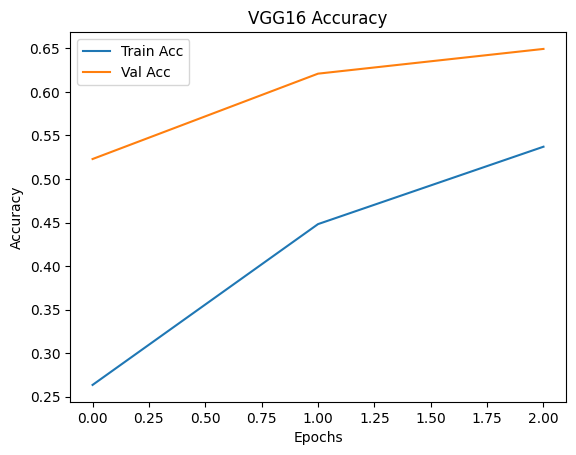

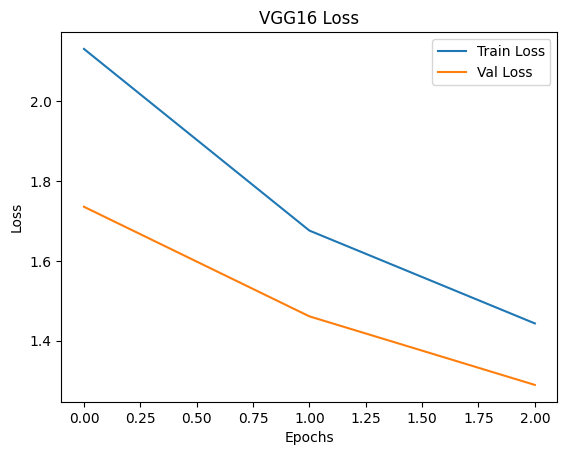

In [16]:
# Accuracy
plt.plot(history_vgg16.history['accuracy'], label='Train Acc')
plt.plot(history_vgg16.history['val_accuracy'], label='Val Acc')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#ResNet50

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
# Load base model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model_resnet.trainable = False  # Freeze pre-trained layers

# Add custom top layers
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=x)

model_resnet.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
checkpoint_resnet = ModelCheckpoint("best_resnet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_resnet = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint_resnet, early_stop_resnet]
)

Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1754 - loss: 2.3079

390/390 ━━━━━━━━━━━━━━━━━━━━ 75s 165ms/step - accuracy: 0.1754 - loss: 2.3078 - val_accuracy: 0.1951 - val_loss: 2.1977
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.2089 - loss: 2.1942

390/390 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - accuracy: 0.2089 - loss: 2.1942 - val_accuracy: 0.2830 - val_loss: 2.0640
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 54s 138ms/step - accuracy: 0.2429 - loss: 2.1081 - val_accuracy: 0.2353 - val_loss: 2.0908
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.2623 - loss: 2.0475

390/390 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.2624 - loss: 2.0475 - val_accuracy: 0.3132 - val_loss: 1.9410
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.2911 - loss: 1.9874

390/390 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.2911 - loss: 1.9873 - val_accuracy: 0.3223 - val_loss: 1.8728
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3069 - loss: 1.9464

390/390 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - accuracy: 0.3069 - loss: 1.9464 - val_accuracy: 0.3324 - val_loss: 1.8203
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3030 - loss: 1.9129

390/390 ━━━━━━━━━━━━━━━━━━━━ 54s 139ms/step - accuracy: 0.3030 - loss: 1.9129 - val_accuracy: 0.3581 - val_loss: 1.7846
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.3216 - loss: 1.8978 - val_accuracy: 0.3489 - val_loss: 1.7926
Epoch 9/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3330 - loss: 1.8668

390/390 ━━━━━━━━━━━━━━━━━━━━ 54s 138ms/step - accuracy: 0.3330 - loss: 1.8668 - val_accuracy: 0.3654 - val_loss: 1.7707
Epoch 10/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3495 - loss: 1.8399

390/390 ━━━━━━━━━━━━━━━━━━━━ 54s 140ms/step - accuracy: 0.3495 - loss: 1.8399 - val_accuracy: 0.3974 - val_loss: 1.7084


200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step
Classification Report for ResNet50:
                                  precision    recall  f1-score   support

                     animal fish       0.69      0.75      0.72       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.82      0.19      0.31       298
   fish sea_food gilt_head_bream       0.31      0.03      0.06       305
   fish sea_food hourse_mackerel       0.26      0.75      0.38       286
        fish sea_food red_mullet       0.28      0.40      0.33       291
     fish sea_food red_sea_bream       0.45      0.26      0.33       273
          fish sea_food sea_bass       0.32      0.08      0.13       327
            fish sea_food shrimp       0.37      0.56      0.45       289
fish sea_food striped_red_mullet       0.28      0.20      0.24       293
             fish sea_food trout       0.46      0.62      0.53       292

                        accura

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


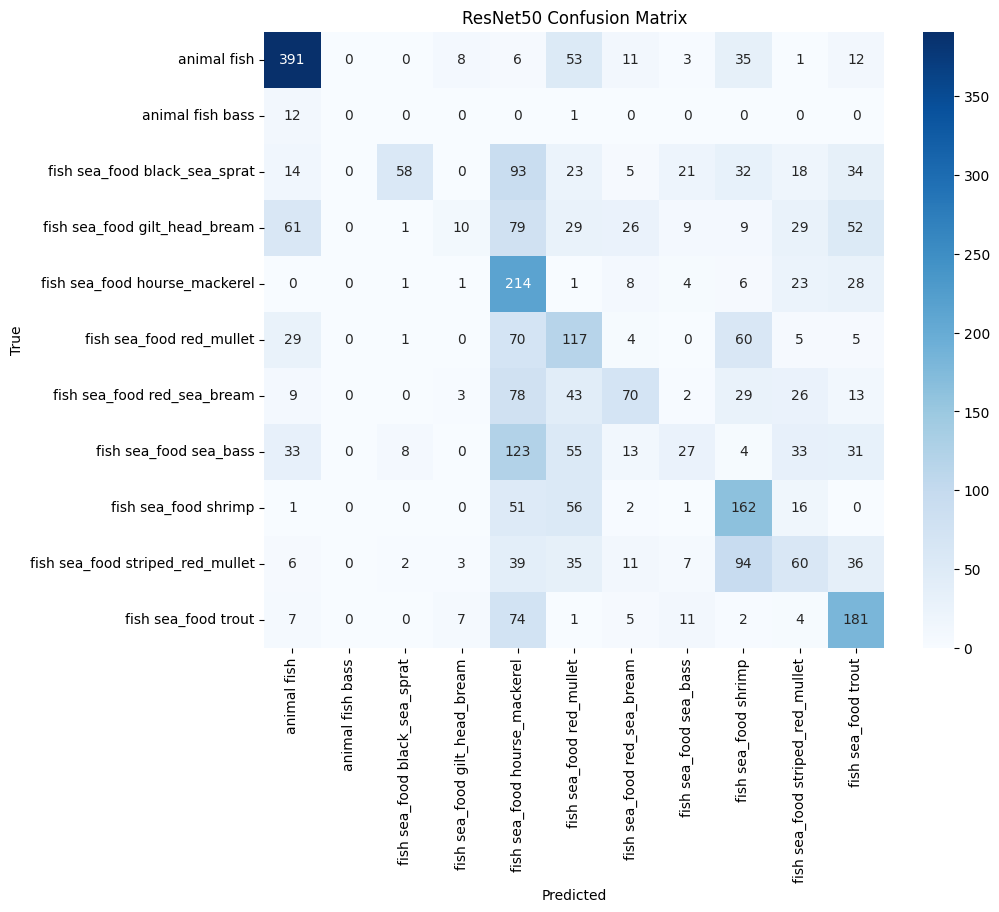

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
Y_pred = model_resnet.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification Report
print("Classification Report for ResNet50:")
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Blues')
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

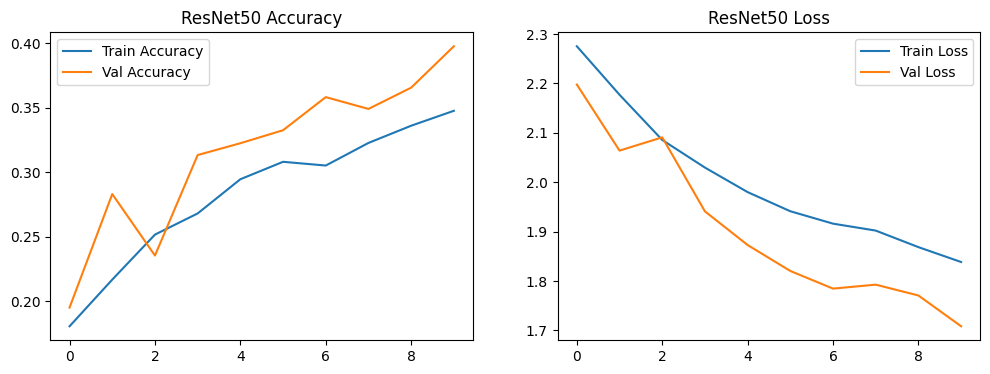

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('ResNet50 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('ResNet50 Loss')
plt.legend()
plt.show()

#MobileNet

In [22]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
# Load pre-trained MobileNet model without top
base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model_mobile.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model_mobile = Model(inputs=base_model_mobile.input, outputs=output)

# Compile the model
model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
checkpoint_mobile = ModelCheckpoint("best_mobilenet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_mobile = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[checkpoint_mobile, early_stop_mobile]
)

Epoch 1/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7704 - loss: 0.7490

390/390 ━━━━━━━━━━━━━━━━━━━━ 62s 146ms/step - accuracy: 0.7707 - loss: 0.7481 - val_accuracy: 0.9020 - val_loss: 0.2744
Epoch 2/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9549 - loss: 0.1307

390/390 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.9549 - loss: 0.1307 - val_accuracy: 0.9725 - val_loss: 0.0876
Epoch 3/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9652 - loss: 0.1062 - val_accuracy: 0.9725 - val_loss: 0.0811


200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step
Classification Report for MobileNet:
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.99       520
                animal fish bass       1.00      0.38      0.56        13
   fish sea_food black_sea_sprat       1.00      0.91      0.95       298
   fish sea_food gilt_head_bream       0.96      0.99      0.98       305
   fish sea_food hourse_mackerel       0.97      0.99      0.98       286
        fish sea_food red_mullet       0.97      0.97      0.97       291
     fish sea_food red_sea_bream       0.99      0.97      0.98       273
          fish sea_food sea_bass       0.98      0.96      0.97       327
            fish sea_food shrimp       0.99      1.00      0.99       289
fish sea_food striped_red_mullet       0.90      0.99      0.94       293
             fish sea_food trout       0.99      1.00      0.99       292

                        accura

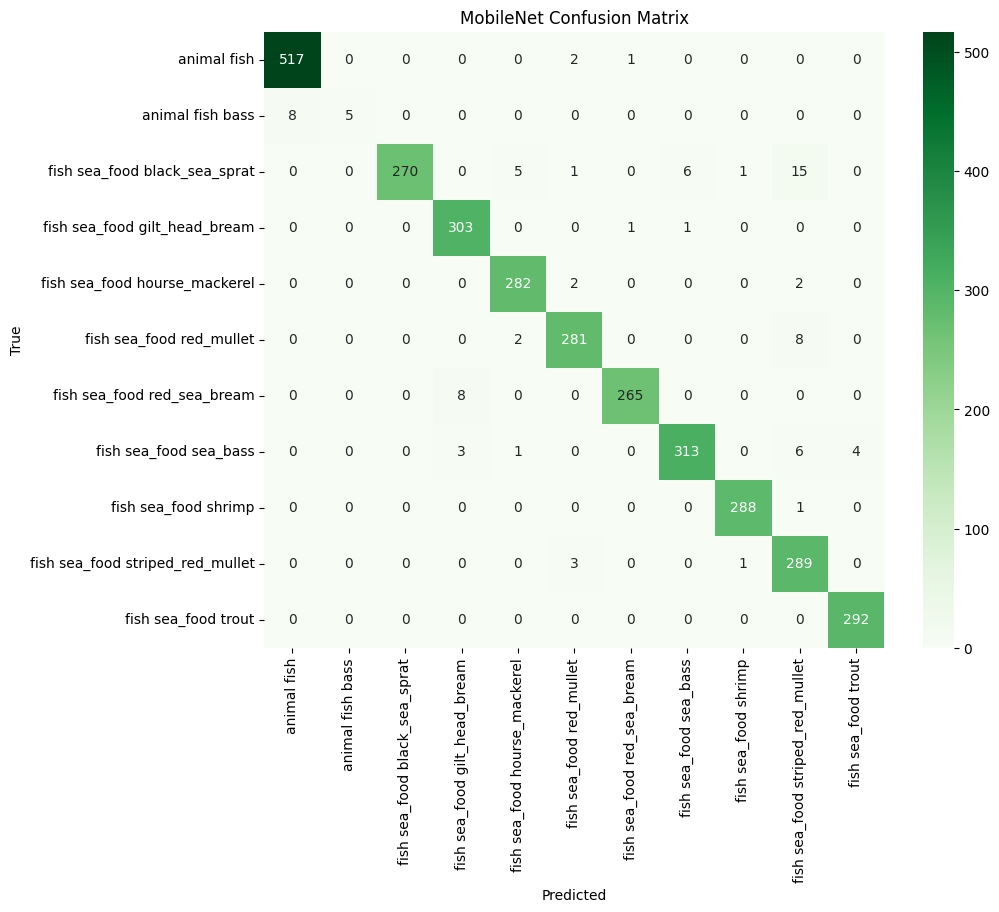

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict test set
Y_pred_mobile = model_mobile.predict(test_generator)
y_pred_mobile = np.argmax(Y_pred_mobile, axis=1)

# Classification report
print("Classification Report for MobileNet:")
print(classification_report(test_generator.classes, y_pred_mobile, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_mobile = confusion_matrix(test_generator.classes, y_pred_mobile)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mobile, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Greens')
plt.title('MobileNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

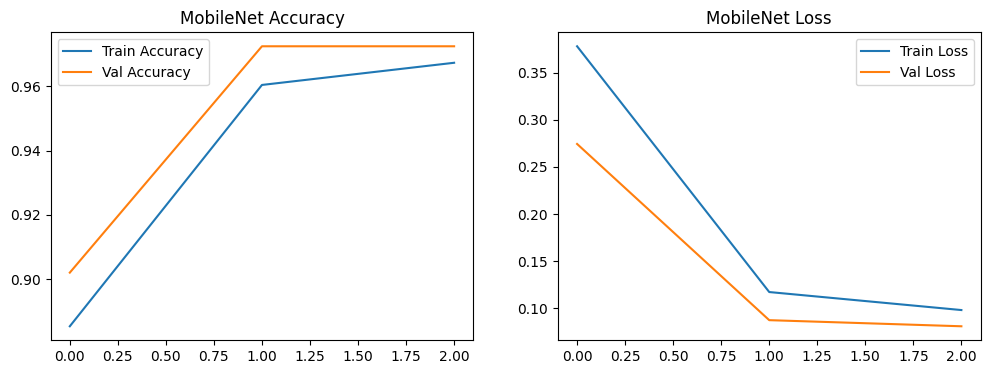

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Val Accuracy')
plt.title('MobileNet Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Val Loss')
plt.title('MobileNet Loss')
plt.legend()
plt.show()

#InceptionV3

In [28]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
# Load pre-trained InceptionV3 without top
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model_inception.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model_inception = Model(inputs=base_model_inception.input, outputs=output)

# Compile the model
model_inception.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
checkpoint_inception = ModelCheckpoint("best_inception_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_inception = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[checkpoint_inception, early_stop_inception]
)

Epoch 1/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5585 - loss: 1.5312

390/390 ━━━━━━━━━━━━━━━━━━━━ 87s 183ms/step - accuracy: 0.5588 - loss: 1.5299 - val_accuracy: 0.8397 - val_loss: 0.4666
Epoch 2/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7969 - loss: 0.5917

390/390 ━━━━━━━━━━━━━━━━━━━━ 55s 139ms/step - accuracy: 0.7970 - loss: 0.5917 - val_accuracy: 0.8764 - val_loss: 0.3683
Epoch 3/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - accuracy: 0.8259 - loss: 0.5009 - val_accuracy: 0.8452 - val_loss: 0.4369


200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 91ms/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.96      0.97      0.97       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.92      0.80      0.86       298
   fish sea_food gilt_head_bream       0.87      0.86      0.86       305
   fish sea_food hourse_mackerel       0.72      0.93      0.81       286
        fish sea_food red_mullet       0.89      0.84      0.86       291
     fish sea_food red_sea_bream       0.93      0.93      0.93       273
          fish sea_food sea_bass       0.81      0.84      0.82       327
            fish sea_food shrimp       0.99      0.83      0.90       289
fish sea_food striped_red_mullet       0.77      0.84      0.80       293
             fish sea_food trout       0.91      0.89      0.90       292

                        accu

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


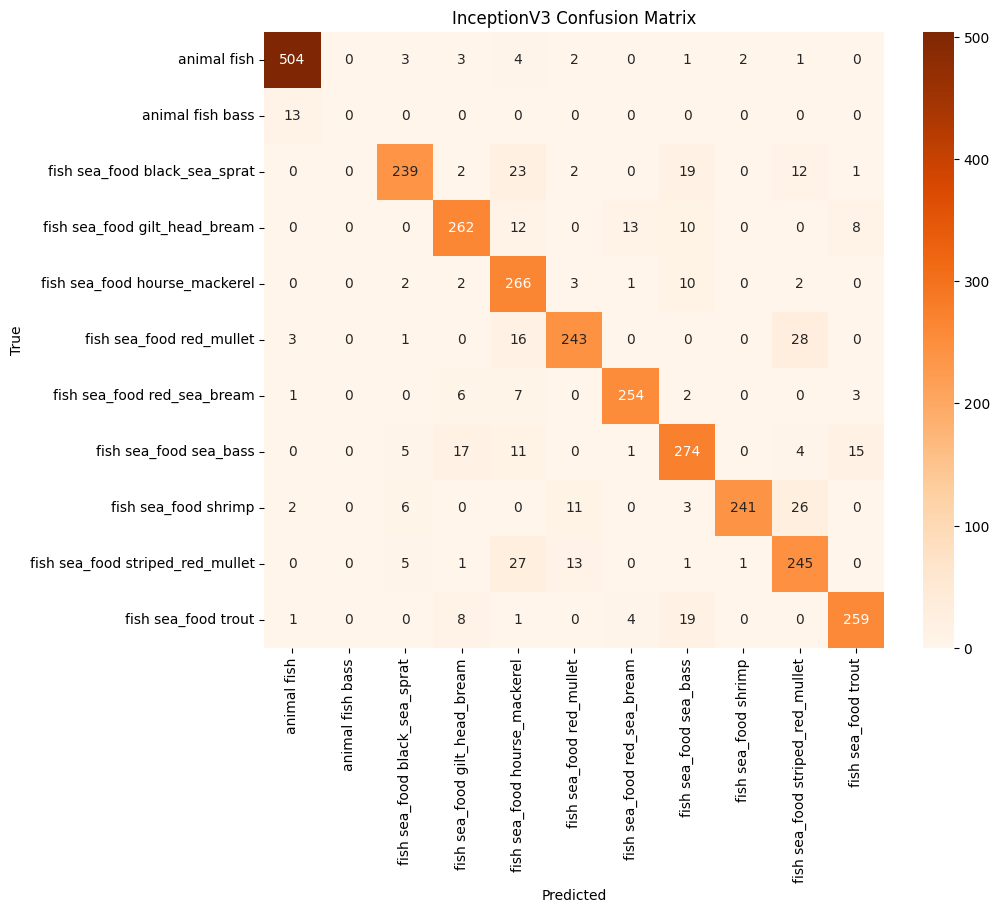

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict test set
Y_pred_inception = model_inception.predict(test_generator)
y_pred_inception = np.argmax(Y_pred_inception, axis=1)

# Classification report
print("Classification Report for InceptionV3:")
print(classification_report(test_generator.classes, y_pred_inception, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_inception = confusion_matrix(test_generator.classes, y_pred_inception)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_inception, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Oranges')
plt.title('InceptionV3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

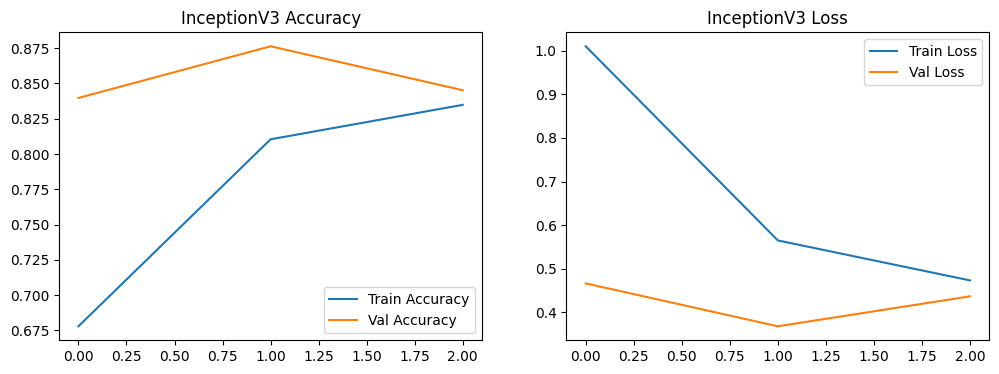

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Val Accuracy')
plt.title('InceptionV3 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Val Loss')
plt.title('InceptionV3 Loss')
plt.legend()
plt.show()

#EfficientNetB0

In [33]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [34]:
# Load pre-trained EfficientNetB0 without top
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model_efficientnet.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_efficientnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model_efficientnet = Model(inputs=base_model_efficientnet.input, outputs=output)

# Compile the model
model_efficientnet.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
checkpoint_efficientnet = ModelCheckpoint("best_efficientnet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_efficientnet = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[checkpoint_efficientnet, early_stop_efficientnet]
)

Epoch 1/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.1643 - loss: 2.3264

390/390 ━━━━━━━━━━━━━━━━━━━━ 101s 206ms/step - accuracy: 0.1643 - loss: 2.3264 - val_accuracy: 0.1712 - val_loss: 2.3224
Epoch 2/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - accuracy: 0.1740 - loss: 2.3030 - val_accuracy: 0.1712 - val_loss: 2.3159
Epoch 3/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 132ms/step - accuracy: 0.1770 - loss: 2.2977 - val_accuracy: 0.1712 - val_loss: 2.3199


200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step
Classification Report for EfficientNetB0:
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


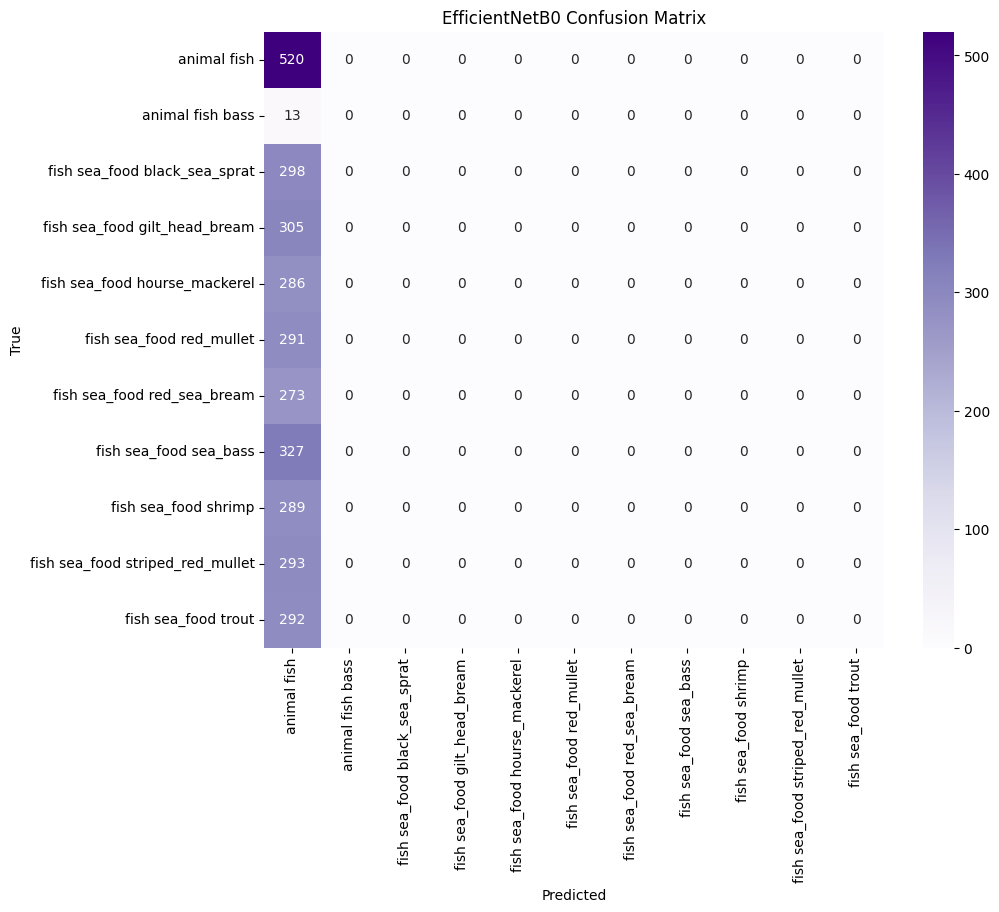

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict test set
Y_pred_efficientnet = model_efficientnet.predict(test_generator)
y_pred_efficientnet = np.argmax(Y_pred_efficientnet, axis=1)

# Classification report
print("Classification Report for EfficientNetB0:")
print(classification_report(test_generator.classes, y_pred_efficientnet, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_efficientnet = confusion_matrix(test_generator.classes, y_pred_efficientnet)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_efficientnet, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Purples')
plt.title('EfficientNetB0 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
from google.colab import files
files.download("/content/vgg16_best.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
from google.colab import files
files.download("/content/best_resnet_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
from google.colab import files
files.download("/content/best_mobilenet_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
from google.colab import files
files.download("/content/best_inception_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from google.colab import files
files.download("/content/best_efficientnet_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>